In [ ]:
#Import necessary packages
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Processing**

In [ ]:
data2 = '/content/drive/MyDrive/Python Classification/data2.csv'
data2_demography = '/content/drive/MyDrive/Python Classification/data2-demography.csv'

In [ ]:
# Membaca dataset
data2 = pd.read_csv(data2)
data2_demography = pd.read_csv(data2_demography)

# Menampilkan beberapa baris awal dari masing-masing dataset
print("MBTI Dataset:")
print(data2.head())

print("\Demography Dataset:")
print(data2_demography.head())

MBTI Dataset:
   participant_id  Introversion Score  Sensing Score  Thinking Score  \
0               1             9.47080       7.141434         6.03696   
1               2             5.85392       6.160195         0.80552   
2               3             7.08615       3.388433         2.66188   
3               4             2.01892       4.823624         7.30625   
4               5             9.91703       4.755080         5.31469   

   Judging Score  
0       4.360278  
1       4.221421  
2       5.127320  
3       5.986550  
4       4.677213  
\Demography Dataset:
   participant_id  Age  Gender  Education    Interest Salary Scale
0               1   19    Male          0     Unknown        Low_2
1               2   27  Female          0      Sports     Medium_6
2               3   21  Female          0     Unknown        Low_2
3               4   28    Male          0      Others        Low_3
4               5   36  Female          1  Technology        Low_2


In [ ]:
# Merge kedua dataset berdasarkan participant_id
merged_data = pd.merge(data2, data2_demography, on="participant_id")
# merged_data = pd.read_csv('/content/drive/MyDrive/Python Classification/data (2).csv')

In [ ]:
personality_counts = merged_data['Salary Scale'].value_counts()
min_count = personality_counts.min()
print(f"Jumlah data minimum per Salary Scale: {min_count}")

NameError: name 'merged_data' is not defined

In [ ]:
# merged_data = merged_data.groupby('Personality').apply(lambda x: x.sample(200)).reset_index(drop=True)
# print(f"Jumlah data setelah balancing: {len(merged_data)}")
# merged_data['Personality'].value_counts() # Untuk verifikasi

In [ ]:
dfC = pd.DataFrame(data2)
dfDC = pd.DataFrame(data2_demography)

In [ ]:
dfC.head()

,participant_id,Introversion Score,Sensing Score,Thinking Score,Judging Score
0,1,9.47080,7.141434,6.03696,4.360278
1,2,5.85392,6.160195,0.80552,4.221421
2,3,7.08615,3.388433,2.66188,5.127320
3,4,2.01892,4.823624,7.30625,5.986550
4,5,9.91703,4.755080,5.31469,4.677213


In [ ]:
dfDC.head()

,participant_id,Age,Gender,Education,Interest,Salary Scale
0,1,19,Male,0,Unknown,Low_2
1,2,27,Female,0,Sports,Medium_6
2,3,21,Female,0,Unknown,Low_2
3,4,28,Male,0,Others,Low_3
4,5,36,Female,1,Technology,Low_2


In [ ]:
# Mengecek jumlah nilai null pada setiap kolom
merged_data.isnull().sum()

,0
participant_id,0
Introversion Score,0
Sensing Score,0
Thinking Score,0
Judging Score,0
Age,0
Gender,0
Education,0
Interest,0
Salary Scale,0


In [ ]:
# Mengecek apakah ada nilai null pada seluruh dataset
merged_data.isnull().values.any()

False

In [ ]:
# Mengecek jumlah nilai 0 pada setiap kolom
(merged_data == 0).sum()

,0
participant_id,0
Introversion Score,0
Sensing Score,8
Thinking Score,0
Judging Score,338
Age,0
Gender,0
Education,75408
Interest,0
Salary Scale,0


In [ ]:
# Mengecek apakah ada nilai 0 pada seluruh dataset
(merged_data == 0).any().any()

True

In [ ]:
# Kolom yang ingin dicek
columns_to_check = ['Introversion Score', 'Sensing Score', 'Thinking Score', 'Judging Score']

# Mengecek jumlah nilai 0 pada kolom yang dipilih
for column in columns_to_check:
    zero_count = (merged_data[column] == 0).sum()
    print(f"Jumlah nilai 0 pada kolom '{column}': {zero_count}")

# Mengecek apakah ada nilai 0 pada kolom yang dipilih
has_zero_values = (merged_data[columns_to_check] == 0).any().any()
print(f"Apakah ada nilai 0 pada kolom yang dipilih: {has_zero_values}")

Jumlah nilai 0 pada kolom 'Introversion Score': 0
Jumlah nilai 0 pada kolom 'Sensing Score': 8
Jumlah nilai 0 pada kolom 'Thinking Score': 0
Jumlah nilai 0 pada kolom 'Judging Score': 338
Apakah ada nilai 0 pada kolom yang dipilih: True


In [ ]:
for column in columns_to_check:
    # Mengambil nilai minimum yang bukan 0
    min_value = merged_data[merged_data[column] != 0][column].min()

    # Mengganti nilai 0 dengan nilai minimum
    merged_data.loc[merged_data[column] == 0, column] = min_value

In [ ]:
# Mengecek jumlah baris duplikat
num_duplicates = merged_data.duplicated().sum()
print(f"Jumlah baris duplikat: {num_duplicates}")

# Menampilkan baris duplikat (opsional)
duplicate_rows = merged_data[merged_data.duplicated()]
print("\nBaris duplikat:")
print(duplicate_rows)

Jumlah baris duplikat: 0

Baris duplikat:
Empty DataFrame
Columns: [participant_id, Introversion Score, Sensing Score, Thinking Score, Judging Score, Age, Gender, Education, Interest, Salary Scale]
Index: []


In [ ]:
# Menghapus baris duplikat dan menyimpan hasilnya di DataFrame baru
merged_data_no_duplicates = merged_data.drop_duplicates()

# Atau, Anda dapat menghapus baris duplikat secara inplace:
merged_data.drop_duplicates(inplace=True)

In [ ]:
unique_interests = merged_data['Interest'].unique()
print(unique_interests)

['Unknown' 'Sports' 'Others' 'Technology' 'Arts']


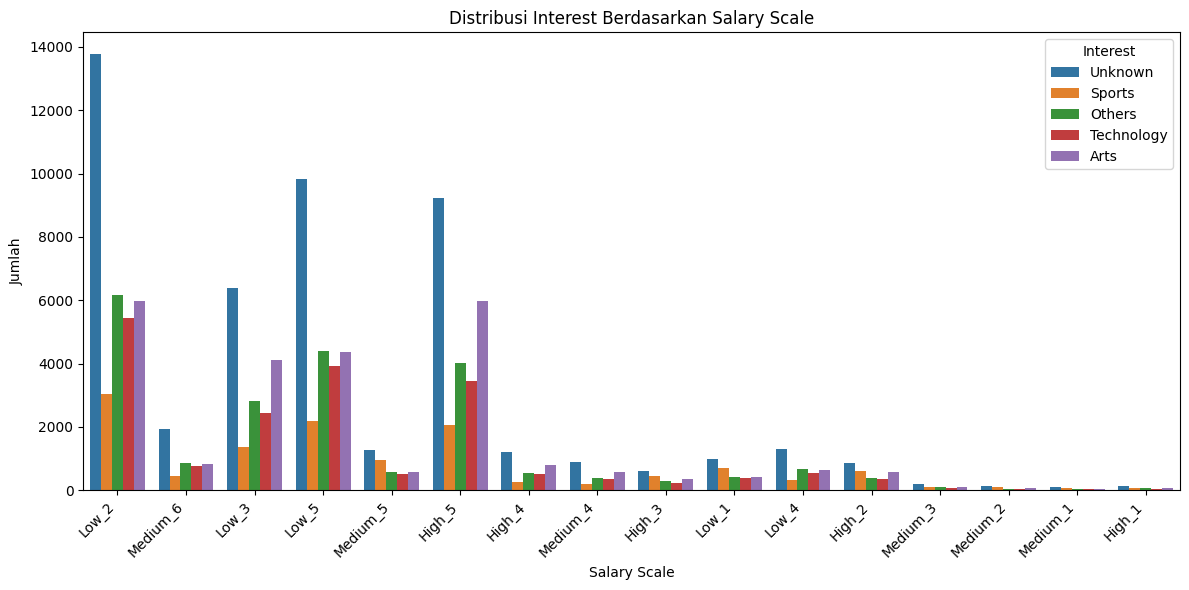

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(x='Salary Scale', hue='Interest', data=merged_data)
plt.title('Distribusi Interest Berdasarkan Salary Scale')
plt.xlabel('Salary Scale')
plt.ylabel('Jumlah')
plt.xticks(rotation=45, ha='right')  # Rotasi label sumbu x agar mudah dibaca
plt.legend(title='Interest')
plt.tight_layout()  # Menyesuaikan layout agar tidak terpotong
plt.show()

In [ ]:
# Cek jumlah data unknown
unknown_count = merged_data['Interest'].value_counts().get('Unknown', 0)
total_count = len(merged_data)
print(f"Unknown Count: {unknown_count}, Total Count: {total_count}")


Unknown Count: 48835, Total Count: 128061


In [ ]:
# # Buat peta distribusi Interest berdasarkan Salary Scale
# interest_map = merged_data[merged_data['Interest'] != 'Unknown'].groupby('Salary Scale')['Interest'].apply(lambda x: x.mode()[0]).to_dict()

# # Ganti Unknown berdasarkan Salary Scale
# merged_data['Interest'] = merged_data.apply(
#     lambda row: interest_map[row['Salary Scale']] if row['Interest'] == 'Unknown' else row['Interest'], axis=1
# )

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Split data into imputing and predicting sets
imputing_data = merged_data[merged_data['Interest'] != 'Unknown']
predicting_data = merged_data[merged_data['Interest'] == 'Unknown']

# Prepare features and target for imputation
X_impute = imputing_data.drop(columns=['Interest'])
y_impute = imputing_data['Interest']

# Create a LabelEncoder object
encoder = LabelEncoder()

# Apply label encoding to categorical features in X_impute
for column in X_impute.select_dtypes(include=['object']).columns:
    X_impute[column] = encoder.fit_transform(X_impute[column])

# Prepare features for prediction
X_predict = predicting_data.drop(columns=['Interest'])

# Apply label encoding to categorical features in X_predict
for column in X_predict.select_dtypes(include=['object']).columns:
    X_predict[column] = encoder.fit_transform(X_predict[column])

# Create and fit the RandomForestClassifier
rf_imputer = RandomForestClassifier(random_state=42)
rf_imputer.fit(X_impute, y_impute)

# Predict missing 'Interest' values
predicted_interest = rf_imputer.predict(X_predict)

# Impute predicted values back into the original DataFrame
merged_data.loc[merged_data['Interest'] == 'Unknown', 'Interest'] = predicted_interest



In [ ]:
# Hitung jumlah dan proporsi Unknown
total_data = len(merged_data)
unknown_count = merged_data['Interest'].value_counts().get('Unknown', 0)
unknown_percentage = (unknown_count / total_data) * 100

print(f"Unknown Count: {unknown_count}")
print(f"Percentage of Unknown: {unknown_percentage:.2f}%")


Unknown Count: 0
Percentage of Unknown: 0.00%


In [ ]:
# # Hapus baris dengan nilai kosong
# merged_data.dropna(inplace=True)


In [ ]:
merged_data = merged_data[merged_data['Interest'] != 'Unknown']

In [ ]:
# from sklearn.utils.class_weight import compute_class_weight

# # Hitung bobot kelas
# class_weights = compute_class_weight(
#     class_weight='balanced',
#     classes=merged_data['Salary Scale'].unique(),
#     y=merged_data['Salary Scale']
# )

# # Buat dictionary pemetaan bobot kelas
# class_weight_dict = dict(zip(merged_data['Salary Scale'].unique(), class_weights))

# # Cetak dictionary bobot kelas
# print(class_weight_dict)

# # ... (kode selanjutnya, misalnya saat training model)
# # model = RandomForestClassifier(random_state=42, class_weight=class_weight_dict)
# # model.fit(X_train, y_train)

In [ ]:
merged_data = merged_data.groupby('Salary Scale').apply(lambda x: x.sample(200)).reset_index(drop=True)
print(f"Jumlah data setelah balancing: {len(merged_data)}")
merged_data['Salary Scale'].value_counts() # Untuk verifikasi

Jumlah data setelah balancing: 3200


<ipython-input-27-c9f139deb535>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged_data = merged_data.groupby('Salary Scale').apply(lambda x: x.sample(200)).reset_index(drop=True)


,count
Salary Scale,
High_1,200
High_2,200
High_3,200
High_4,200
High_5,200
Low_1,200
Low_2,200
Low_3,200
Low_4,200


In [ ]:
merged_data = merged_data.head(1000)

In [ ]:
merged_data.info()
merged_data.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   participant_id      1000 non-null   int64  
 1   Introversion Score  1000 non-null   float64
 2   Sensing Score       1000 non-null   float64
 3   Thinking Score      1000 non-null   float64
 4   Judging Score       1000 non-null   float64
 5   Age                 1000 non-null   int64  
 6   Gender              1000 non-null   object 
 7   Education           1000 non-null   int64  
 8   Interest            1000 non-null   object 
 9   Salary Scale        1000 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 78.2+ KB


,0
participant_id,int64
Introversion Score,float64
Sensing Score,float64
Thinking Score,float64
Judging Score,float64
Age,int64
Gender,object
Education,int64
Interest,object
Salary Scale,object


In [ ]:
unique_interests = merged_data['Salary Scale'].unique()
print(unique_interests)

['High_1' 'High_2' 'High_3' 'High_4' 'High_5']


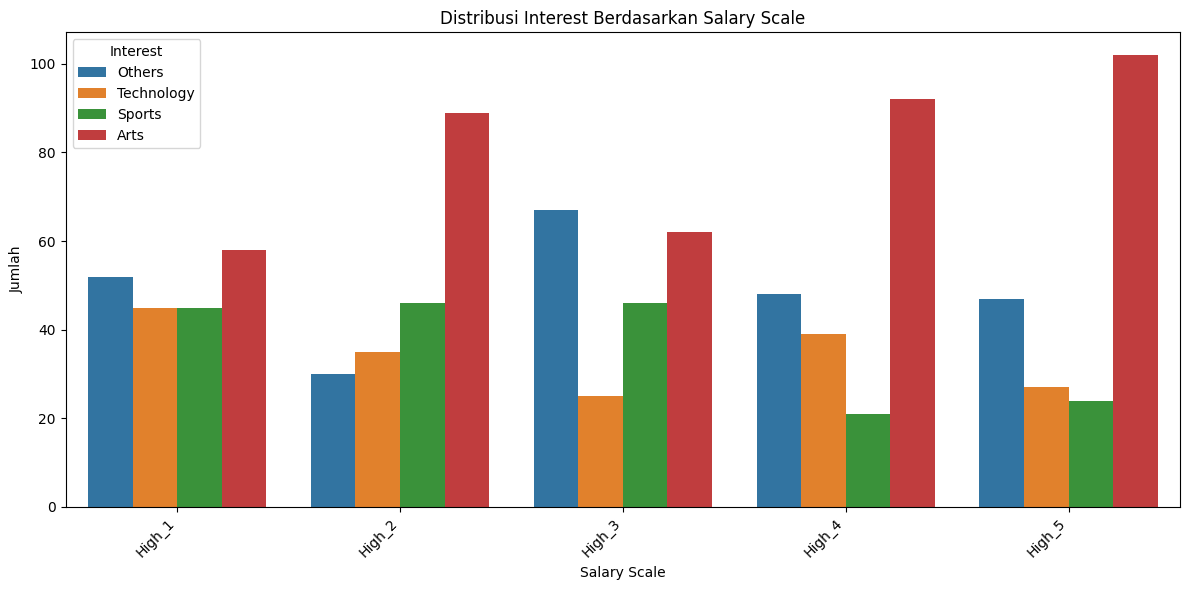

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Salary Scale', hue='Interest', data=merged_data)
plt.title('Distribusi Interest Berdasarkan Salary Scale')
plt.xlabel('Salary Scale')
plt.ylabel('Jumlah')
plt.xticks(rotation=45, ha='right')  # Rotasi label sumbu x agar mudah dibaca
plt.legend(title='Interest')
plt.tight_layout()  # Menyesuaikan layout agar tidak terpotong
plt.show()

In [ ]:
from tabulate import tabulate
import pandas as pd

# Asumsikan 'encoder' adalah objek LabelEncoder Anda yang sudah dilatih
salary_scale_labels = encoder.classes_

# Buat DataFrame untuk pemetaan
salary_scale_mapping = pd.DataFrame({
    'Salary Scale (Encoded)': range(len(salary_scale_labels)),
    'Salary Scale (Label)': salary_scale_labels
})

# Generate tabel markdown
table_md = tabulate(salary_scale_mapping, headers='keys', tablefmt='pipe')

# Print tabel markdown
print(table_md)

|    |   Salary Scale (Encoded) | Salary Scale (Label)   |
|---:|-------------------------:|:-----------------------|
|  0 |                        0 | High_1                 |
|  1 |                        1 | High_2                 |
|  2 |                        2 | High_3                 |
|  3 |                        3 | High_4                 |
|  4 |                        4 | High_5                 |
|  5 |                        5 | Low_1                  |
|  6 |                        6 | Low_2                  |
|  7 |                        7 | Low_3                  |
|  8 |                        8 | Low_4                  |
|  9 |                        9 | Low_5                  |
| 10 |                       10 | Medium_1               |
| 11 |                       11 | Medium_2               |
| 12 |                       12 | Medium_3               |
| 13 |                       13 | Medium_4               |
| 14 |                       14 | Medium_5              

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
merged_data['Gender'] = encoder.fit_transform(merged_data['Gender'])
merged_data['Interest'] = encoder.fit_transform(merged_data['Interest'])
merged_data['Salary Scale'] = encoder.fit_transform(merged_data['Salary Scale'])

In [ ]:
unique_interests = merged_data['Interest'].unique()
print(unique_interests)

[1 3 2 0]


In [ ]:
X = merged_data[['Introversion Score', 'Sensing Score', 'Thinking Score', 'Judging Score', 'Age', 'Gender', 'Education', 'Interest']]
y = merged_data['Salary Scale']

In [ ]:
from imblearn.over_sampling import SMOTE

# Setting k_neighbors to a smaller value
smote = SMOTE(random_state=42, k_neighbors=1)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.pipeline import Pipeline

# # Hitung jumlah data yang diinginkan untuk setiap Salary Scale
# target_count = max(merged_data['Salary Scale'].value_counts())

# # Buat dictionary target jumlah data untuk setiap Salary Scale
# target_counts = {Salary Scale: target_count for Salary Scale in merged_data['Salary Scale'].unique()}

# # Definisikan pipeline
# pipeline = Pipeline([
#     ('oversampling', SMOTE(sampling_strategy=target_counts)),  # Menggunakan target_counts untuk oversampling
#     ('undersampling', RandomUnderSampler(sampling_strategy=target_counts)) # Menggunakan target_counts untuk undersampling
# ])

# # Terapkan pipeline pada data Anda
# X_resampled, y_resampled = pipeline.fit_resample(X, y)

In [ ]:
# # Contoh menggunakan sns.countplot()
# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.countplot(y)  # y adalah kolom target Anda
# plt.title("Distribusi Kelas Target Sebelum Oversampling")
# plt.show()

In [ ]:
# Contoh membandingkan jumlah sampel
print("Jumlah sampel sebelum oversampling:", len(y))
print("Jumlah sampel setelah oversampling:", len(y_resampled))

Jumlah sampel sebelum oversampling: 1000
Jumlah sampel setelah oversampling: 1000


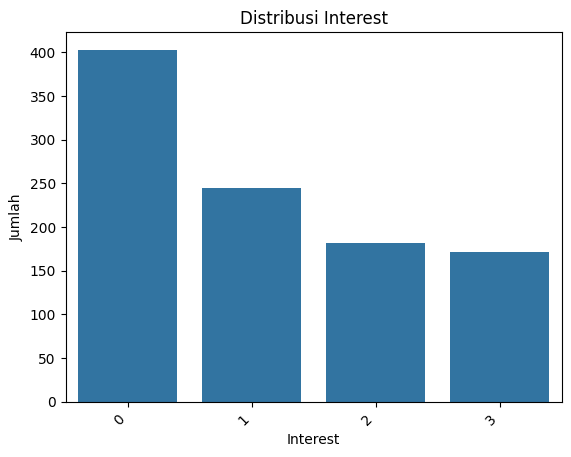

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi distribusi kelas target (Interest)
sns.countplot(x='Interest', data=merged_data)
plt.title('Distribusi Interest')
plt.xlabel('Interest')
plt.ylabel('Jumlah')
plt.xticks(rotation=45, ha='right')
plt.show()

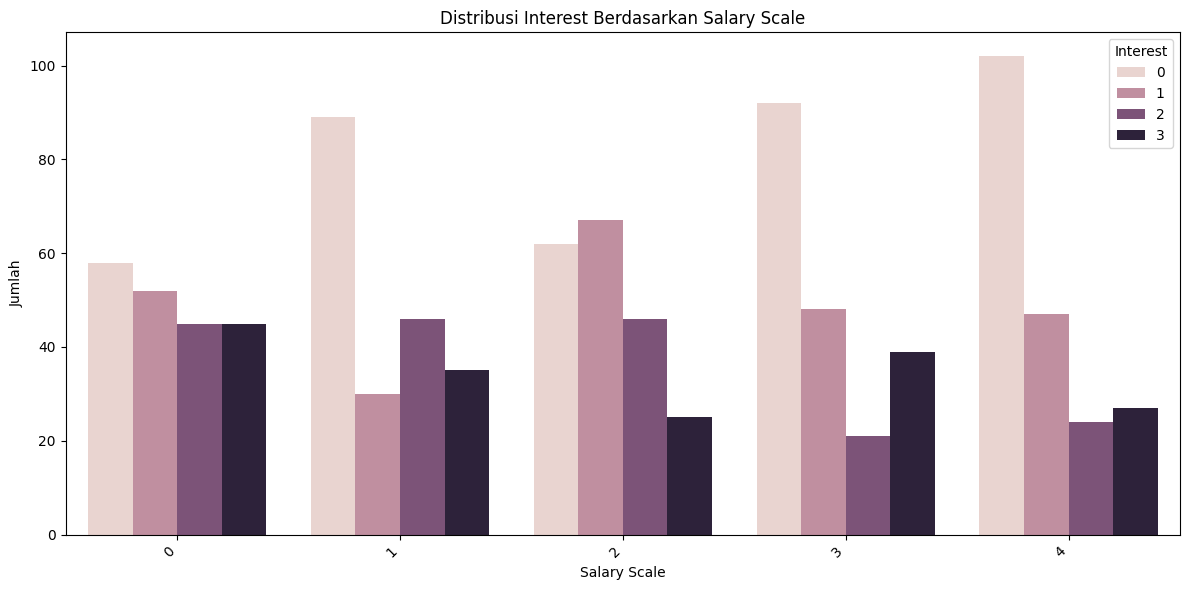

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Salary Scale', hue='Interest', data=merged_data)
plt.title('Distribusi Interest Berdasarkan Salary Scale')
plt.xlabel('Salary Scale')
plt.ylabel('Jumlah')
plt.xticks(rotation=45, ha='right')  # Rotasi label sumbu x agar mudah dibaca
plt.legend(title='Interest')
plt.tight_layout()  # Menyesuaikan layout agar tidak terpotong
plt.show()

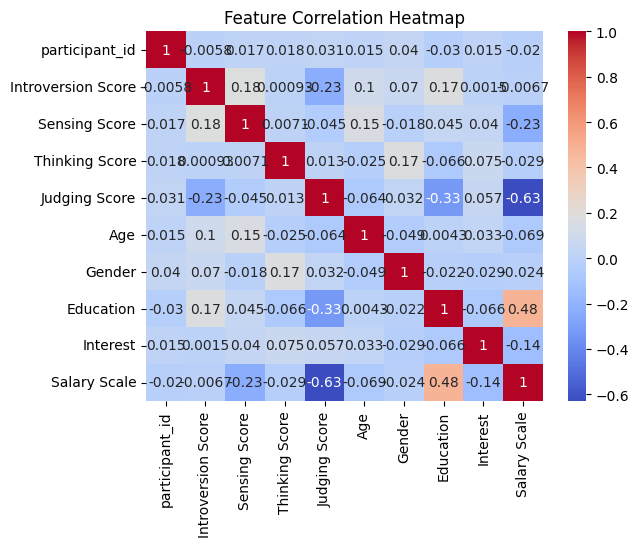

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = merged_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
correlation_matrix = merged_data.corr()
correlation_text = correlation_matrix.to_string()
print(correlation_text)

                    participant_id  Introversion Score  Sensing Score  Thinking Score  Judging Score       Age    Gender  Education  Interest  Salary Scale
participant_id            1.000000           -0.005794       0.016812        0.018246       0.031198  0.015298  0.039669  -0.030176  0.015055     -0.020440
Introversion Score       -0.005794            1.000000       0.181327        0.000930      -0.230521  0.100060  0.069541   0.174974  0.001518     -0.006724
Sensing Score             0.016812            0.181327       1.000000        0.007053      -0.045286  0.153270 -0.018303   0.045389  0.039975     -0.234892
Thinking Score            0.018246            0.000930       0.007053        1.000000       0.012564 -0.025301  0.167486  -0.066141  0.075384     -0.029003
Judging Score             0.031198           -0.230521      -0.045286        0.012564       1.000000 -0.064006  0.031853  -0.329143  0.057386     -0.629966
Age                       0.015298            0.100060       0.1

In [ ]:
# pip install tabulate

In [ ]:
from tabulate import tabulate

correlation_matrix = merged_data.corr()
correlation_table = tabulate(correlation_matrix, headers='keys', tablefmt='psql')
print(correlation_table)

+--------------------+------------------+----------------------+-----------------+------------------+-----------------+-------------+------------+-------------+-------------+----------------+
|                    |   participant_id |   Introversion Score |   Sensing Score |   Thinking Score |   Judging Score |         Age |     Gender |   Education |    Interest |   Salary Scale |
|--------------------+------------------+----------------------+-----------------+------------------+-----------------+-------------+------------+-------------+-------------+----------------|
| participant_id     |       1          |         -0.00579407  |       0.0168117 |      0.0182458   |       0.0311984 |  0.0152978  |  0.0396694 | -0.0301764  |  0.0150546  |    -0.0204399  |
| Introversion Score |      -0.00579407 |          1           |       0.181327  |      0.000930303 |      -0.230521  |  0.10006    |  0.0695412 |  0.174974   |  0.00151814 |    -0.00672384 |
| Sensing Score      |       0.0168117  

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = range(1, 50)  # Rentang nilai n yang ingin diuji
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Menampilkan akurasi untuk setiap nilai k
for k, accuracy in zip(k_values, accuracies):
    print(f"k={k}, accuracy={accuracy}")

k=1, accuracy=0.74
k=2, accuracy=0.756
k=3, accuracy=0.76
k=4, accuracy=0.76
k=5, accuracy=0.776
k=6, accuracy=0.772
k=7, accuracy=0.78
k=8, accuracy=0.78
k=9, accuracy=0.78
k=10, accuracy=0.78
k=11, accuracy=0.788
k=12, accuracy=0.784
k=13, accuracy=0.788
k=14, accuracy=0.788
k=15, accuracy=0.8
k=16, accuracy=0.792
k=17, accuracy=0.796
k=18, accuracy=0.772
k=19, accuracy=0.772
k=20, accuracy=0.78
k=21, accuracy=0.78
k=22, accuracy=0.76
k=23, accuracy=0.772
k=24, accuracy=0.748
k=25, accuracy=0.772
k=26, accuracy=0.76
k=27, accuracy=0.756
k=28, accuracy=0.756
k=29, accuracy=0.764
k=30, accuracy=0.76
k=31, accuracy=0.756
k=32, accuracy=0.752
k=33, accuracy=0.748
k=34, accuracy=0.744
k=35, accuracy=0.74
k=36, accuracy=0.752
k=37, accuracy=0.76
k=38, accuracy=0.764
k=39, accuracy=0.764
k=40, accuracy=0.756
k=41, accuracy=0.744
k=42, accuracy=0.752
k=43, accuracy=0.76
k=44, accuracy=0.748
k=45, accuracy=0.752
k=46, accuracy=0.744
k=47, accuracy=0.756
k=48, accuracy=0.752
k=49, accuracy=0.7

In [ ]:
optimal_k = k_values[accuracies.index(max(accuracies))]
print(f"Nilai k optimal: {optimal_k}")

Nilai k optimal: 15


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Latih model KNN
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

# Prediksi data testing
y_pred_knn = knn.predict(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score

# Lakukan cross-validation dengan 5 fold (dapat diubah sesuai kebutuhan)
cv_scores = cross_val_score(knn, X, y, cv=5)  # X dan y adalah fitur dan target Anda

# Tampilkan hasil cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.685 0.74  0.715 0.7   0.74 ]
Mean Accuracy: 0.716


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Pilih 5 fitur terbaik
selector = SelectKBest(score_func=f_classif, k=35)
X_selected = selector.fit_transform(X, y)

# Tampilkan skor fitur
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
print(feature_scores.sort_values(by='Score', ascending=False))


              Feature       Score
1       Sensing Score  296.270789
0  Introversion Score  290.516563
3       Judging Score  288.626064
6           Education  107.689779
4                 Age   17.021971
7            Interest    5.586917
5              Gender    1.966212
2      Thinking Score    0.814660


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:779: UserWarning: k=35 is greater than n_features=8. All the features will be returned.
  warnings.warn(


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X, y)

feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
print(feature_scores.sort_values(by='Score', ascending=False))


              Feature       Score
1       Sensing Score  296.270789
0  Introversion Score  290.516563
3       Judging Score  288.626064
6           Education  107.689779
4                 Age   17.021971
7            Interest    5.586917
5              Gender    1.966212
2      Thinking Score    0.814660


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.stats import chi2_contingency

# Prediksi menggunakan model KNN
y_pred_knn = knn.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy)

# Hitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Add a pseudocount (e.g., 1) to all cells of the confusion matrix
conf_matrix = conf_matrix + 1

# Hitung chi-square score dan p-value
chi2, p, dof, expected = chi2_contingency(conf_matrix)

# Tampilkan hasilnya
print("\nChi-square score:", chi2)
print("P-value:", p)

print("\nChi-square score:", chi2)
print("P-value:", p)
print(f"P-value: {p:.5f}")
print(f"P-value: {p:.5e}")

print("P-value: {}".format(format(p, '.5f')))  # Desimal
print("P-value: {}".format(format(p, '.5e')))  # Scientific notation

from decimal import Decimal

print("P-value: {}".format(Decimal(p)))

Accuracy: 0.8

Chi-square score: 539.6585160890052
P-value: 1.3842246434881888e-104

Chi-square score: 539.6585160890052
P-value: 1.3842246434881888e-104
P-value: 0.00000
P-value: 1.38422e-104
P-value: 0.00000
P-value: 1.38422e-104
P-value: 1.384224643488188786533645444662037304998971543026095409906251861079933978321165121512018066315375865130164326685091672735391302026047200153907886886486442761769541922110228323397383890534074259700129956925125518865208872444708759062295485261252128746513150037156236749069648794829845428466796875E-104


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.stats import chi2_contingency
from decimal import Decimal, getcontext
import math
import numpy as np

# ... (kode sebelumnya)

# Hitung chi-square score dan p-value
chi2, p, dof, expected = chi2_contingency(conf_matrix)

# Tampilkan hasilnya
print("\nChi-square score:", chi2)

# Mencoba menampilkan p-value dengan presisi lebih tinggi
print(f"P-value: {p:.15f}")
print(f"P-value: {p:.10e}")

# Mencoba menggunakan Decimal dengan presisi tinggi
getcontext().prec = 50
print("P-value (Decimal): {}".format(Decimal(p)))

# Menampilkan logaritma p-value, handle p=0 case
# If p is 0, replace it with a very small positive number to avoid the error
# np.finfo(float).eps is the smallest positive number representable in float64
if p == 0:
    p = np.finfo(float).eps
print(f"Log P-value: {math.log(p)}")

# ... (kode selanjutnya)


Chi-square score: 539.6585160890052
P-value: 0.000000000000000
P-value: 1.3842246435e-104
P-value (Decimal): 1.384224643488188786533645444662037304998971543026095409906251861079933978321165121512018066315375865130164326685091672735391302026047200153907886886486442761769541922110228323397383890534074259700129956925125518865208872444708759062295485261252128746513150037156236749069648794829845428466796875E-104
Log P-value: -239.14370951269777


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.8
KNN Confusion Matrix:
 [[45  0  1  0  0]
 [11 40  7  0  0]
 [ 3  1 43  0  0]
 [ 6  0  1 37  0]
 [ 2  8  2  8 35]]
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.98      0.80        46
           1       0.82      0.69      0.75        58
           2       0.80      0.91      0.85        47
           3       0.82      0.84      0.83        44
           4       1.00      0.64      0.78        55

    accuracy                           0.80       250
   macro avg       0.82      0.81      0.80       250
weighted avg       0.83      0.80      0.80       250



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Latih model Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=250, max_depth = 20, max_features='sqrt', min_samples_split=2, min_samples_leaf=1)
rf.fit(X_train, y_train)

# Prediksi data testing
y_pred_rf = rf.predict(X_test)

In [ ]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.94
Random Forest Confusion Matrix:
 [[44  0  1  1  0]
 [ 0 53  5  0  0]
 [ 0  6 41  0  0]
 [ 0  0  0 44  0]
 [ 0  0  0  2 53]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        46
           1       0.90      0.91      0.91        58
           2       0.87      0.87      0.87        47
           3       0.94      1.00      0.97        44
           4       1.00      0.96      0.98        55

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250



In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Lakukan cross-validation dengan 5 fold (dapat diubah sesuai kebutuhan)
cv_scores = cross_val_score(rf, X, y, cv=5)  # X dan y adalah fitur dan target Anda

# Tampilkan hasil cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.945 0.9   0.92  0.885 0.93 ]
Mean Accuracy: 0.916


In [ ]:
from sklearn.model_selection import GridSearchCV

# Parameter untuk KNN
param_grid_knn = {'n_neighbors': [3, 15, 46], 'weights': ['uniform', 'distance']}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_knn.fit(X_train, y_train)

print("Best parameters for KNN:", grid_knn.best_params_)

# Parameter untuk Random Forest
param_grid_rf = {'n_estimators': [100, 200, 250], 'max_depth': [10, 20, None]}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)
grid_rf.fit(X_train, y_train)

print("Best parameters for Random Forest:", grid_rf.best_params_)


Best parameters for KNN: {'n_neighbors': 15, 'weights': 'distance'}
Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 250}


In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV

# # Definisikan grid parameter yang akan dicoba
# param_grid = {
#     'n_estimators': [10, 100, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# # Buat objek GridSearchCV
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# # Latih model dengan Grid Search
# grid_search.fit(X_train, y_train)  # Ganti X_train dan y_train dengan data Anda

# # Tampilkan parameter terbaik
# print("Parameter terbaik:", grid_search.best_params_)

# # Gunakan model terbaik untuk prediksi
# best_rf_model = grid_search.best_estimator_
# y_pred = best_rf_model.predict(X_test)  # Ganti X_test dengan data testing Anda

# # Evaluasi model (opsional)
# # ... (kode evaluasi model, seperti accuracy, confusion matrix, dll.)

In [ ]:
from sklearn.metrics import accuracy_score
from scipy.stats import chi2_contingency # Import chi2_contingency from scipy.stats

# Make predictions using the best model from GridSearchCV
y_pred = rf.predict(X_test)  # Changed rf to best_rf_model

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))

# Hitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Hitung chi-square score dan p-value
chi2, p, dof, expected = chi2_contingency(conf_matrix)

# Tampilkan hasilnya
print("\nChi-square score:", chi2)
print("P-value:", p)
print(f"P-value: {p:.5f}")
print(f"P-value: {p:.5e}")

print("P-value: {}".format(format(p, '.5f')))  # Desimal
print("P-value: {}".format(format(p, '.5e')))  # Scientific notation

from decimal import Decimal

print("P-value: {}".format(Decimal(p)))

Accuracy: 0.94

Chi-square score: 865.6992147483467
P-value: 5.953834731666159e-174
P-value: 0.00000
P-value: 5.95383e-174
P-value: 0.00000
P-value: 5.95383e-174
P-value: 5.9538347316661593189953781099959869721365912062046931959337473055459249840486572021270972246391574545854909530184054577030093540675274827158779416098504338064066788415118027191729481623934809367970890975795981637720554587947317743736125291314830040682177599236446643330214579238234041490925013607892023383440300744673556692603188860979540416267520212133593548157650720549895296758923258138342439272125776380598636584873251109684133552946150302886962890625E-174


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.945 0.9   0.92  0.885 0.93 ]
Mean Accuracy: 0.916


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.stats import chi2_contingency
from decimal import Decimal, getcontext
import math
import numpy as np

# Hitung chi-square score dan p-value
chi2, p, dof, expected = chi2_contingency(conf_matrix)

# Tampilkan hasilnya
print("\nChi-square score:", chi2)

# Mencoba menampilkan p-value dengan presisi lebih tinggi
print(f"P-value: {p:.15f}")
print(f"P-value: {p:.10e}")

# Mencoba menggunakan Decimal dengan presisi tinggi
getcontext().prec = 50
print("P-value (Decimal): {}".format(Decimal(p)))

# Menampilkan logaritma p-value, handle p=0 case
# If p is 0, replace it with a very small positive number to avoid the error
# np.finfo(float).eps is the smallest positive number representable in float64
if p == 0:
    p = np.finfo(float).eps
print(f"Log P-value: {math.log(p)}")

# ... (kode selanjutnya)


Chi-square score: 865.6992147483467
P-value: 0.000000000000000
P-value: 5.9538347317e-174
P-value (Decimal): 5.9538347316661593189953781099959869721365912062046931959337473055459249840486572021270972246391574545854909530184054577030093540675274827158779416098504338064066788415118027191729481623934809367970890975795981637720554587947317743736125291314830040682177599236446643330214579238234041490925013607892023383440300744673556692603188860979540416267520212133593548157650720549895296758923258138342439272125776380598636584873251109684133552946150302886962890625E-174
Log P-value: -398.86577067628565


In [ ]:
contingency_table = pd.crosstab(merged_data['Introversion Score'], merged_data['Salary Scale'])
print(contingency_table)

contingency_table = pd.crosstab(merged_data['Judging Score'], merged_data['Salary Scale'])
print(contingency_table)

from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Salary Scale        0  1  2  3  4
Introversion Score               
0.01939             0  0  1  0  0
0.02064             0  0  1  0  0
0.04953             0  0  1  0  0
0.08670             0  0  1  0  0
0.09490             0  0  1  0  0
...                .. .. .. .. ..
9.93512             0  0  0  0  1
9.93739             0  0  0  0  1
9.97427             0  1  0  0  0
9.98457             0  0  0  1  0
9.98520             0  0  0  1  0

[1000 rows x 5 columns]
Salary Scale   0  1  2  3  4
Judging Score               
0.000272       0  0  0  1  1
0.101775       0  0  0  1  0
0.266676       0  0  0  1  0
0.519149       0  0  0  0  1
0.542036       0  0  0  1  0
...           .. .. .. .. ..
8.409129       0  0  1  0  0
8.463157       0  1  0  0  0
8.518731       0  0  1  0  0
8.614665       0  0  1  0  0
9.018063       0  0  1  0  0

[999 rows x 5 columns]
Chi-square statistic: 3995.000000000001
P-value: 0.483637244608604
Degrees of freedom: 3992
Expected frequencies:
 [[0.4 0.4 0.4 0.4

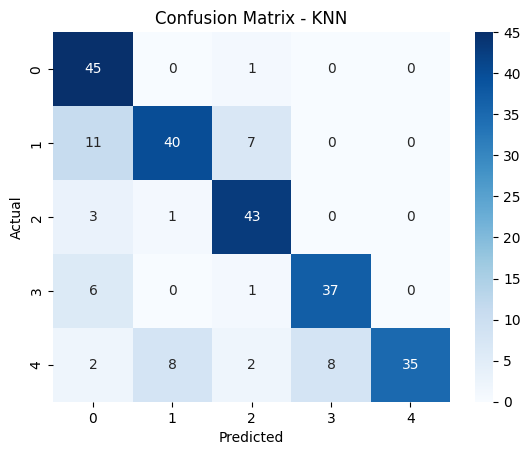

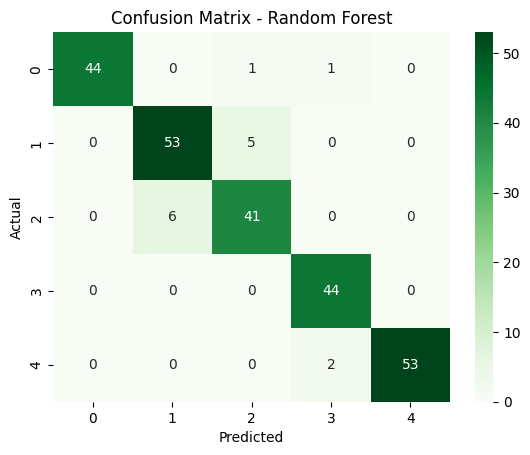

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix untuk KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Confusion matrix untuk Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

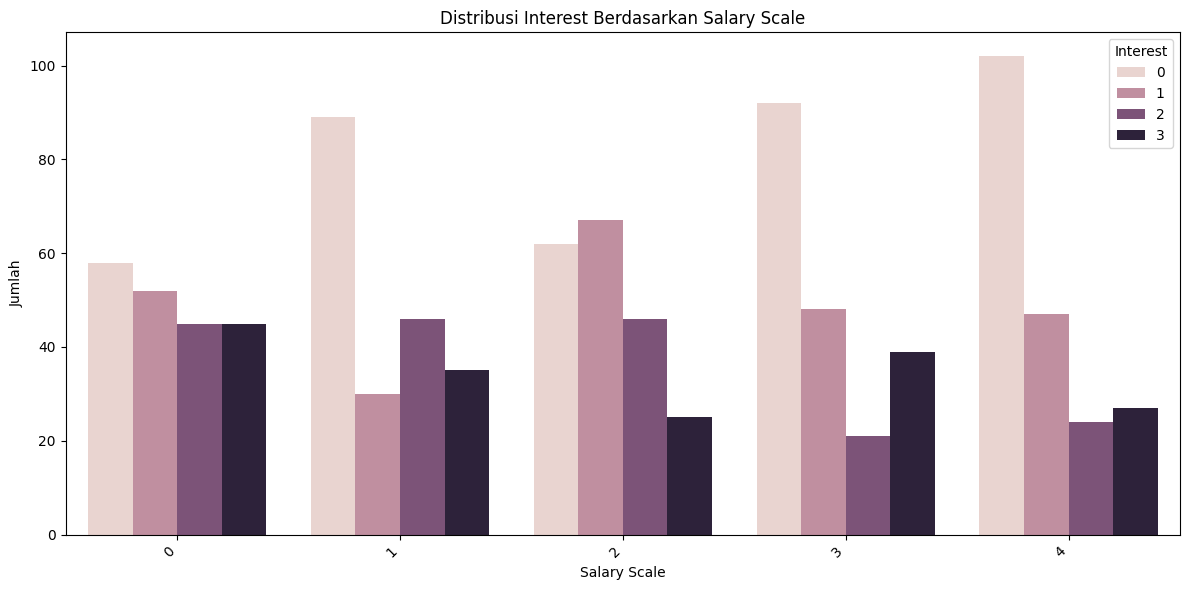

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Salary Scale', hue='Interest', data=merged_data)
plt.title('Distribusi Interest Berdasarkan Salary Scale')
plt.xlabel('Salary Scale')
plt.ylabel('Jumlah')
plt.xticks(rotation=45, ha='right')  # Rotasi label sumbu x agar mudah dibaca
plt.legend(title='Interest')
plt.tight_layout()  # Menyesuaikan layout agar tidak terpotong
plt.show()

In [ ]:
print(merged_data['Interest'].value_counts())


Interest
0    403
1    244
2    182
3    171
Name: count, dtype: int64


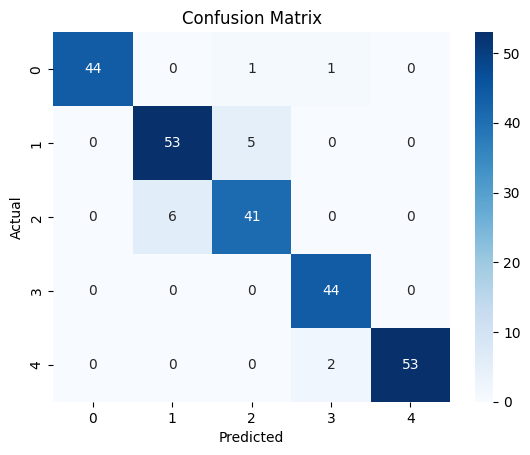

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


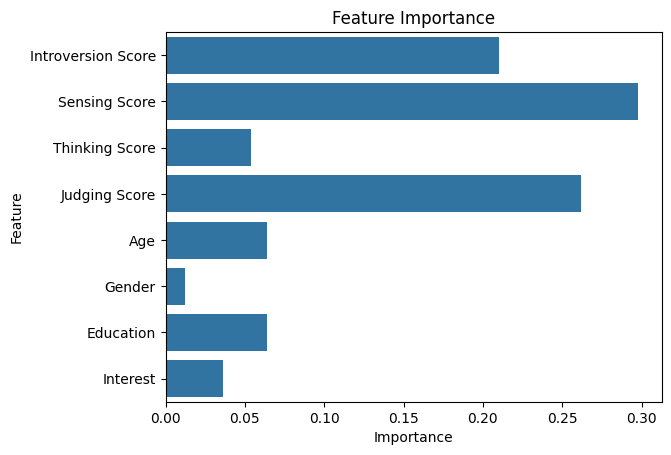

In [ ]:
# Visualisasi feature importance (jika model mendukungnya)
feature_importances = rf.feature_importances_ # Contoh untuk Random Forest
sns.barplot(x=feature_importances, y=X.columns) # X adalah fitur-fitur Anda
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

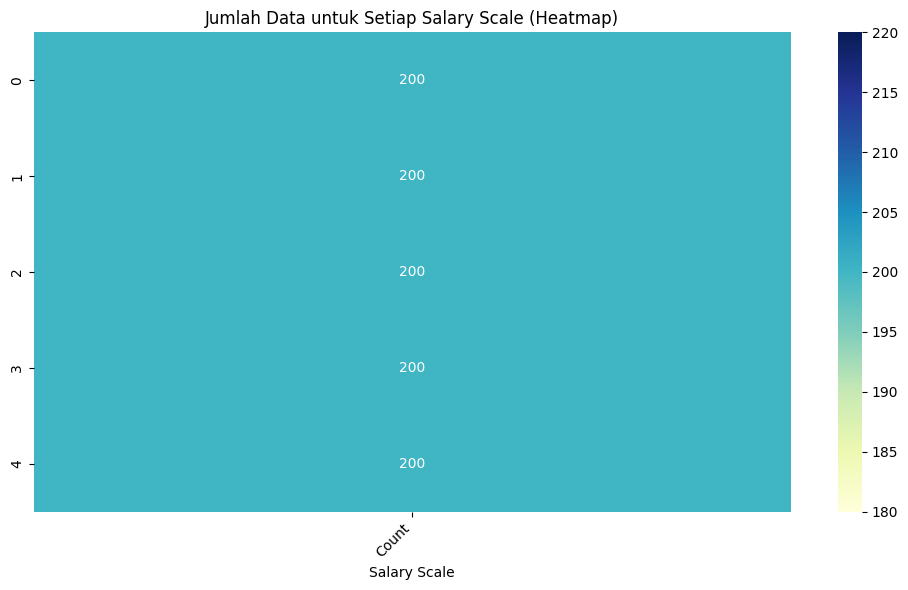

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Menghitung jumlah data untuk setiap personality
salary_scale_counts = merged_data['Salary Scale'].value_counts()

# Membuat DataFrame untuk heatmap
salary_scale_counts_df = pd.DataFrame({'Salary Scale': salary_scale_counts.index, 'Count': salary_scale_counts.values})

# Membuat heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(salary_scale_counts_df.pivot_table(index='Salary Scale', values='Count', aggfunc='sum'), annot=True, fmt="d", cmap="YlGnBu")
plt.title('Jumlah Data untuk Setiap Salary Scale (Heatmap)')
plt.xlabel('Salary Scale')
plt.ylabel('') # Mengosongkan label sumbu y
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# # Heatmap Personality vs Salary Scale
# heatmap_data = pd.crosstab(merged_data['Personality'])
# sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
# plt.title('Personality vs Salary Scale')
# plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Penanganan Outliers (contoh capping)
for column in X.columns:
    upper_limit = X[column].quantile(0.95)  # Batas atas (persentil ke-95)
    lower_limit = X[column].quantile(0.05)  # Batas bawah (persentil ke-5)
    X[column] = np.clip(X[column], lower_limit, upper_limit)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}
grid = GridSearchCV(GaussianNB(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)
print(grid.best_params_)

<ipython-input-72-616af379d735>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = np.clip(X[column], lower_limit, upper_limit)
<ipython-input-72-616af379d735>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = np.clip(X[column], lower_limit, upper_limit)
<ipython-input-72-616af379d735>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .................var_smoothing=1.0;, score=0.787 total time=   0.0s
[CV 2/5] END .................var_smoothing=1.0;, score=0.727 total time=   0.0s
[CV 3/5] END .................var_smoothing=1.0;, score=0.760 total time=   0.0s
[CV 4/5] END .................var_smoothing=1.0;, score=0.727 total time=   0.0s
[CV 5/5] END .................var_smoothing=1.0;, score=0.827 total time=   0.0s
[CV 1/5] END ..var_smoothing=0.8111308307896871;, score=0.793 total time=   0.0s
[CV 2/5] END ..var_smoothing=0.8111308307896871;, score=0.727 total time=   0.0s
[CV 3/5] END ..var_smoothing=0.8111308307896871;, score=0.780 total time=   0.0s
[CV 4/5] END ..var_smoothing=0.8111308307896871;, score=0.733 total time=   0.0s
[CV 5/5] END ..var_smoothing=0.8111308307896871;, score=0.833 total time=   0.0s
[CV 1/5] END ...var_smoothing=0.657933224657568;, score=0.800 total time=   0.0s
[CV 2/5] END ...var_smoothing=0.65793322465756

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inisialisasi model Naive Bayes
nb_model = GaussianNB(var_smoothing = 0.03511191734215131)

# Latih model dengan data training
nb_model.fit(X_train, y_train)

# Prediksi data testing
y_pred_nb = nb_model.predict(X_test)

# Evaluasi model
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naive Bayes Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.848
Naive Bayes Confusion Matrix:
 [[45  0  1  0  0]
 [ 4 48  6  0  0]
 [ 1  4 42  0  0]
 [ 7  0  0 37  0]
 [ 1  9  1  4 40]]
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.98      0.87        46
           1       0.79      0.83      0.81        58
           2       0.84      0.89      0.87        47
           3       0.90      0.84      0.87        44
           4       1.00      0.73      0.84        55

    accuracy                           0.85       250
   macro avg       0.86      0.85      0.85       250
weighted avg       0.86      0.85      0.85       250



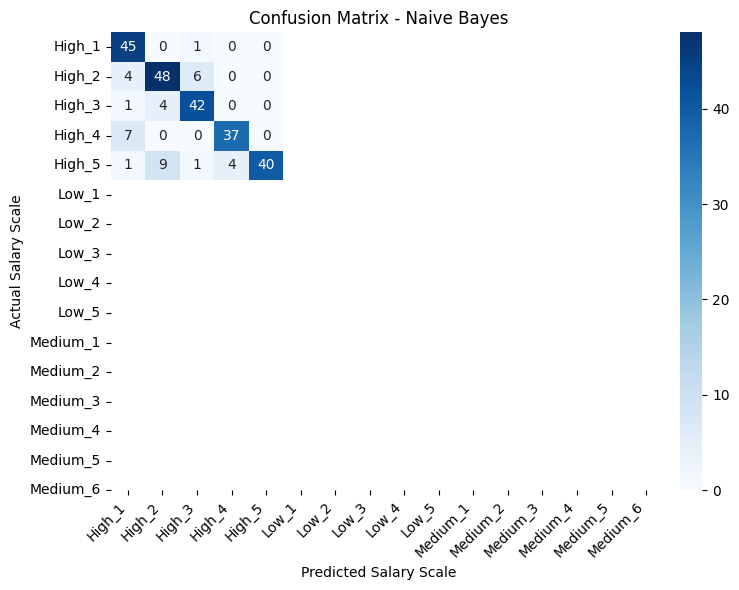

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# --- Visualisasi Confusion Matrix ---
# Hitung confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Visualisasikan confusion matrix menggunakan seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues",
            xticklabels=salary_scale_labels,
            yticklabels=salary_scale_labels)
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted Salary Scale")
plt.ylabel("Actual Salary Scale")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()